# Problem Statement
## Credit Card Defaulter Prediction
Predict which customer might default in upcoming months.
We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.


In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Load the data
df = pd.read_csv('UCI_Credit_Card.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## Dataset Description according to datset source
ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## EDA

In [5]:
# the repayment status is indicated in columns PAY_0, PAY_2 ... with no PAY_1 column, so we rename PAY_0 to PAY_1 
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [6]:
df.rename(columns={'default.payment.next.month':'defaulter'}, inplace=True)

In [7]:
# check for missing values for surity
df.isna().sum()   

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulter    0
dtype: int64

In [8]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

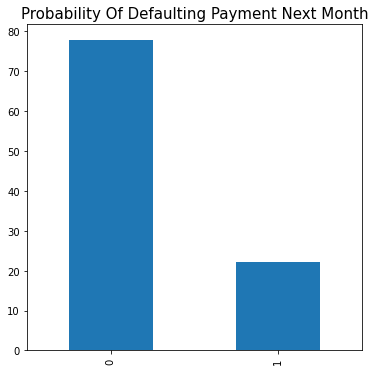

In [9]:
def_cnt = (df.defaulter.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
plt.show()

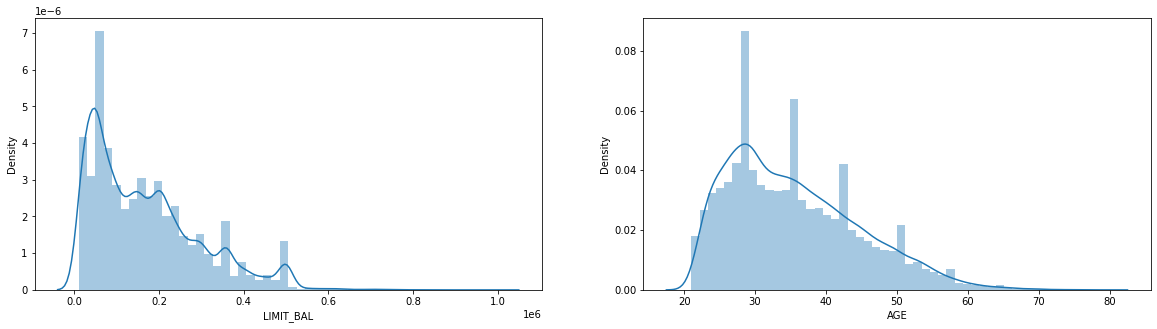

In [10]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)
plt.subplot(122)
sns.distplot(df.AGE)
plt.show()

<AxesSubplot:xlabel='defaulter', ylabel='count'>

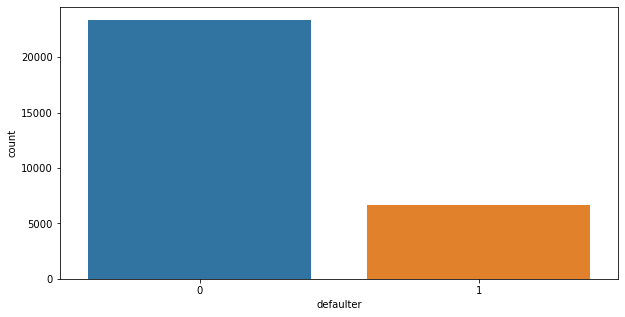

In [11]:
# Dependent Feature 
plt.figure(figsize=(10,5))
sns.countplot(x = 'defaulter', data = df)

In [12]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [13]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [14]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [15]:
# Marriage
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [16]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

1 = married; 2 = single; 3 = others



## Plotting our categorical features
### I will create a new dataframe for all the catagorical features for better visualization


In [17]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [18]:
df_cat = df[categorical_features]
df_cat['defaulter'] = df['defaulter']


In [19]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,defaulter
0,2,2,1,1
1,2,2,2,1
2,2,2,2,0
3,2,2,1,0
4,1,2,1,0


In [20]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [21]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,defaulter
0,FEMALE,university,married,1
1,FEMALE,university,single,1
2,FEMALE,university,single,0
3,FEMALE,university,married,0
4,MALE,university,married,0


#### Bivariate Plots

<AxesSubplot:xlabel='defaulter', ylabel='AGE'>

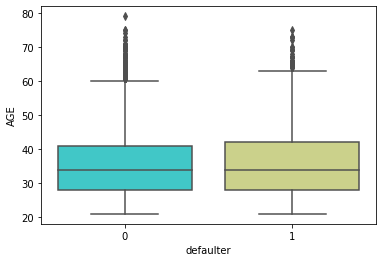

In [22]:
sns.boxplot(x='defaulter',y='AGE',data=df,palette='rainbow')

<AxesSubplot:xlabel='defaulter', ylabel='AGE'>

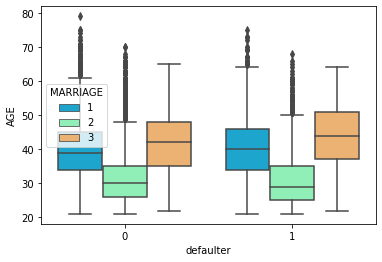

In [23]:
sns.boxplot(x='defaulter',hue='MARRIAGE', y='AGE',data=df,palette="rainbow")

<AxesSubplot:xlabel='defaulter', ylabel='AGE'>

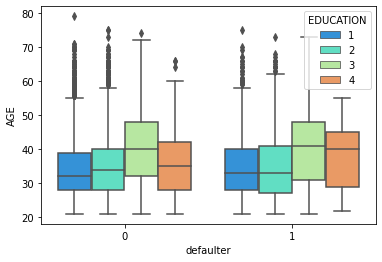

In [24]:
sns.boxplot(x='defaulter',hue='EDUCATION', y='AGE',data=df,palette="rainbow")

<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

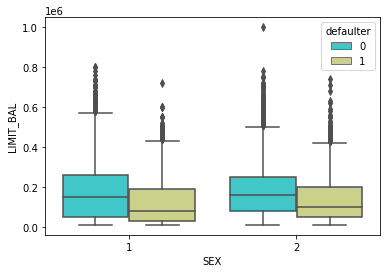

In [25]:
sns.boxplot(x='SEX',hue='defaulter', y='LIMIT_BAL',data=df,palette="rainbow")


<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

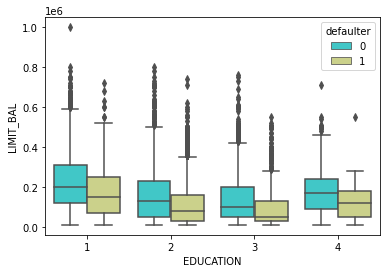

In [26]:
sns.boxplot(x='EDUCATION',hue='defaulter', y='LIMIT_BAL',data=df,palette="rainbow")


<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

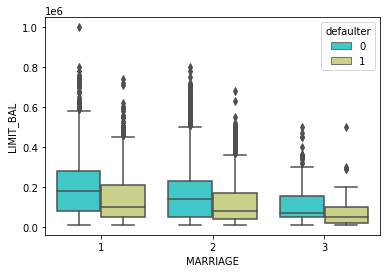

In [27]:
sns.boxplot(x='MARRIAGE',hue='defaulter', y='LIMIT_BAL',data=df,palette="rainbow")


<Figure size 720x360 with 0 Axes>

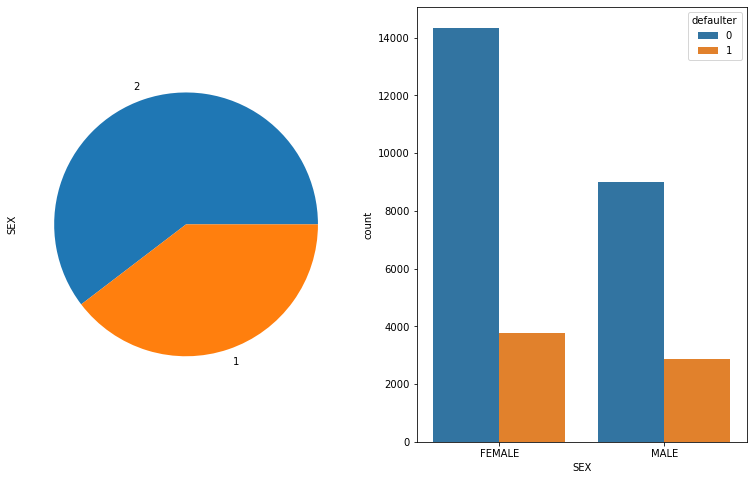

<Figure size 720x360 with 0 Axes>

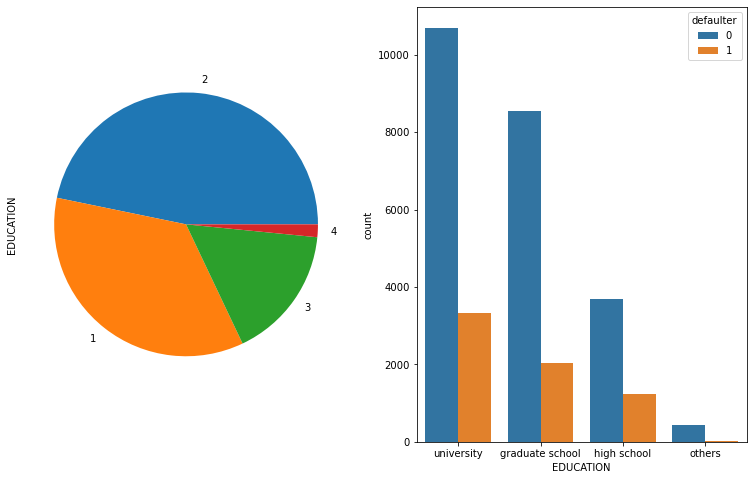

<Figure size 720x360 with 0 Axes>

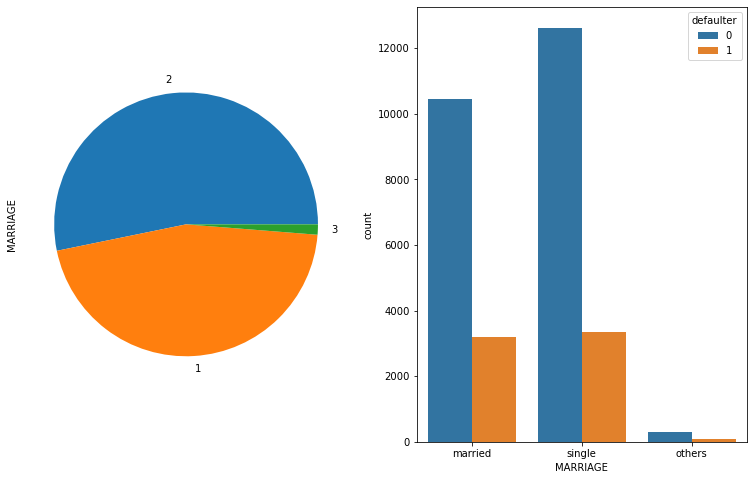

In [28]:
for col in categorical_features:
    plt.figure(figsize=(10,5))
    fig, axes = plt.subplots(ncols=2,figsize=(13,8))
    df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
    sns.countplot(x = col, hue = 'defaulter', data = df_cat)

* There are more females credit card holder,so no. of defaulter have high proportion of females.
* No. of defaulters have a higher proportion of educated people (graduate school and university)
* No. of defaulters have a higher proportion of Singles.

### Numerical Features

### Limit Balance

In [29]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<AxesSubplot:xlabel='defaulter', ylabel='LIMIT_BAL'>

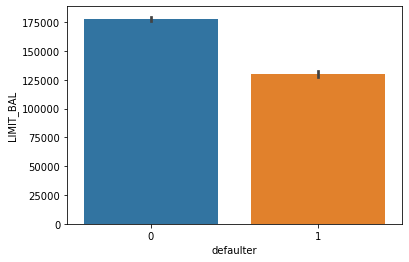

In [30]:
sns.barplot(x='defaulter', y='LIMIT_BAL', data=df)

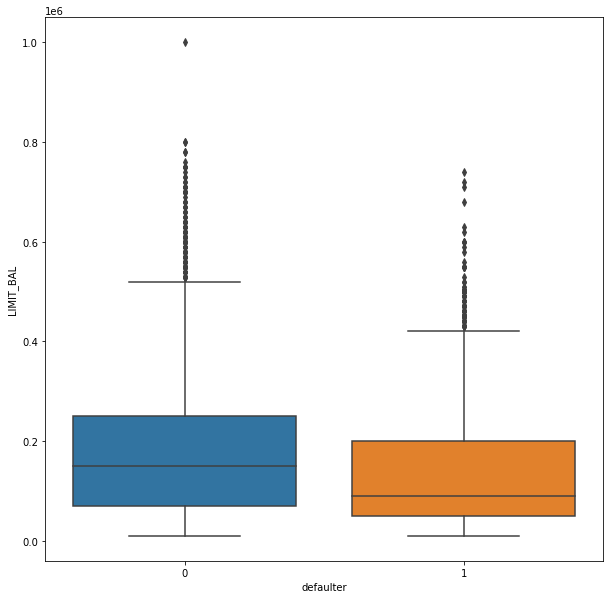

In [31]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="defaulter", y="LIMIT_BAL", data= df)


In [32]:
#renaming columns according to the dataset description for better understanding

# Renaming Payment columns
df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
# Renaming Bill Amount Columns
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
# Renaming total Amount for particular months columns
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [33]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'defaulter'],
      dtype='object')

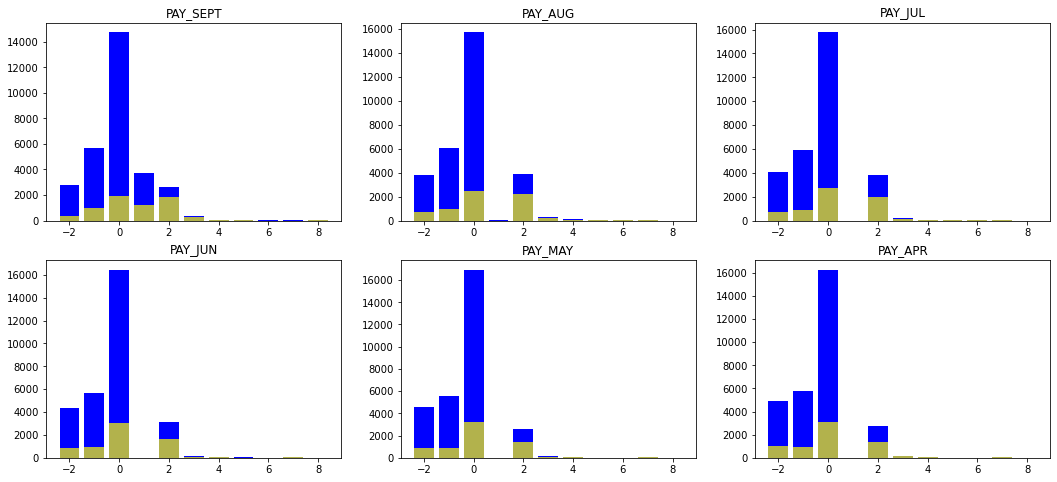

In [34]:
# Subplot of Multiple numerical columns vs counts
pay_status_columns = ['PAY_SEPT','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
 
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3
    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['defaulter']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='blue')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
plt.show()

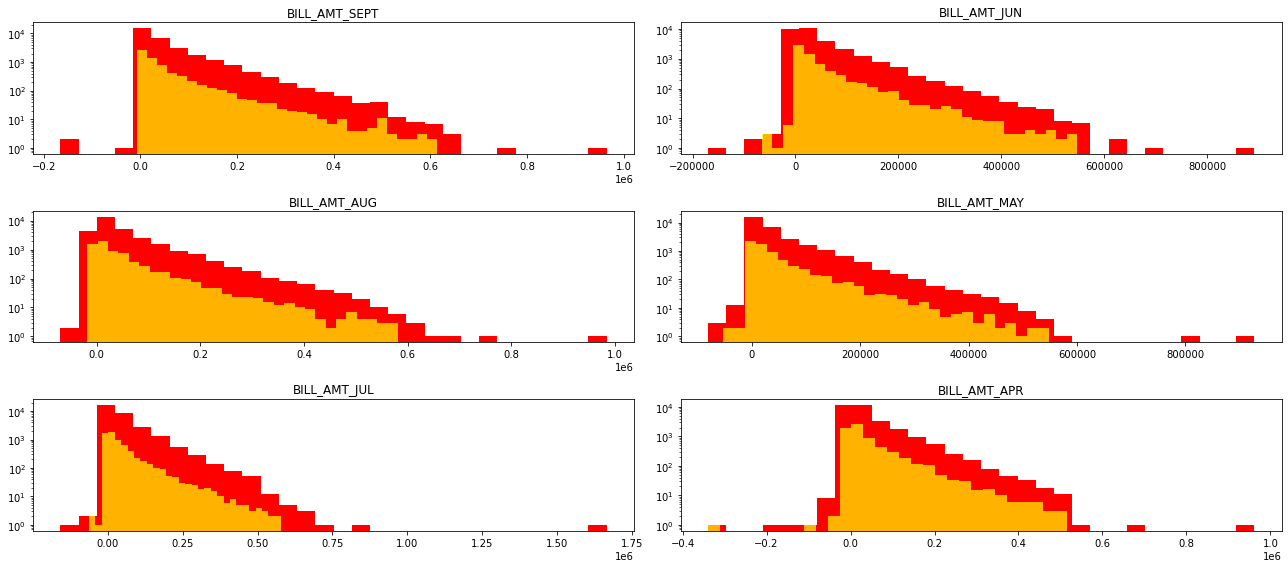

In [35]:
# Subplot of Multiple numerical columns vs counts
bill_atm_columns = ['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY','BILL_AMT_APR']
 
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(bill_atm_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[bill_atm_columns[i]], 30, color ='red')
    ax[row,col].hist(df[bill_atm_columns[i]][(df['defaulter']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log')
plt.tight_layout()
plt.show()


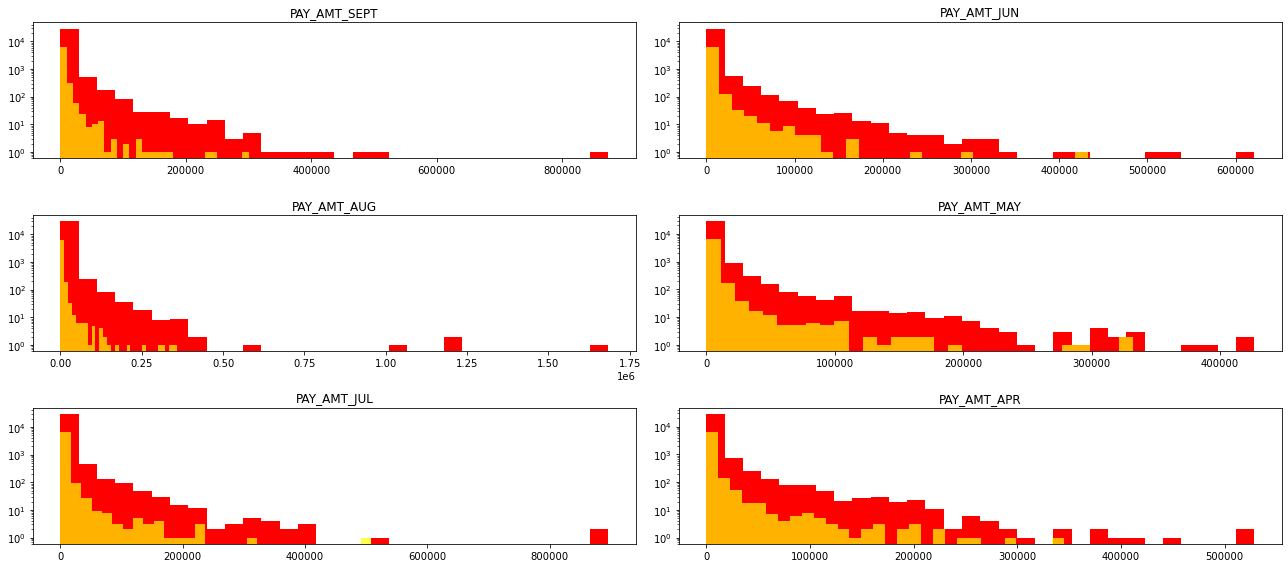

In [36]:
# Subplot of Multiple numerical columns vs counts
pay_amt_columns = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
 
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(df[pay_amt_columns[i]][(df['defaulter']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log')
plt.tight_layout()
plt.show()


In [37]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Age

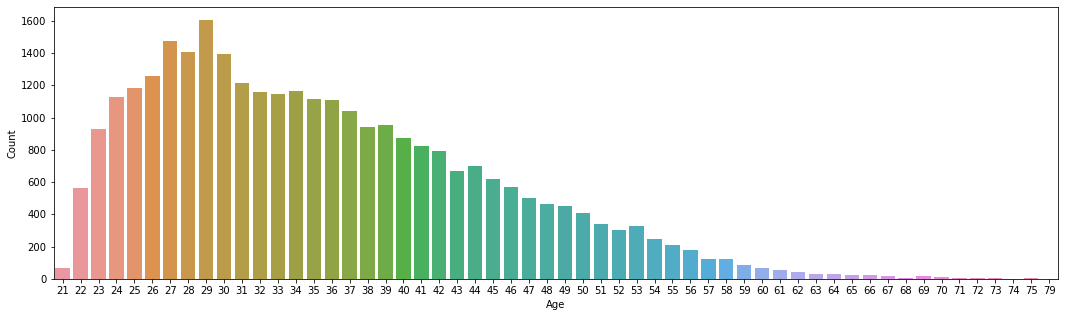

In [38]:
plt.figure(figsize=(18,5))
age=df['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age,orient='v')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<AxesSubplot:xlabel='defaulter', ylabel='AGE'>

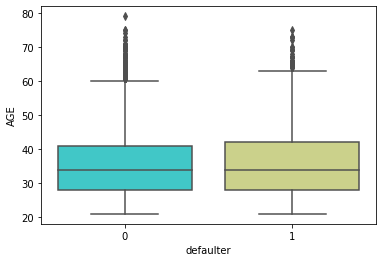

In [39]:
sns.boxplot(x='defaulter',y='AGE',data=df,palette='rainbow')


<AxesSubplot:xlabel='defaulter', ylabel='AGE'>

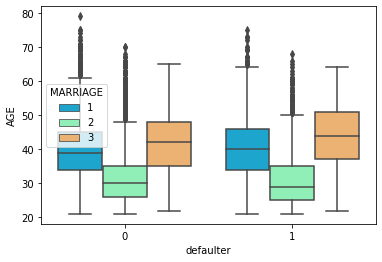

In [40]:
sns.boxplot(x='defaulter',hue='MARRIAGE', y='AGE',data=df,palette="rainbow")


<AxesSubplot:xlabel='defaulter', ylabel='AGE'>

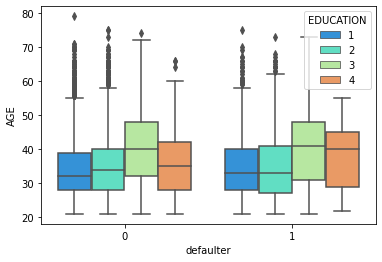

In [41]:
sns.boxplot(x='defaulter',hue='EDUCATION', y='AGE',data=df,palette="rainbow" )


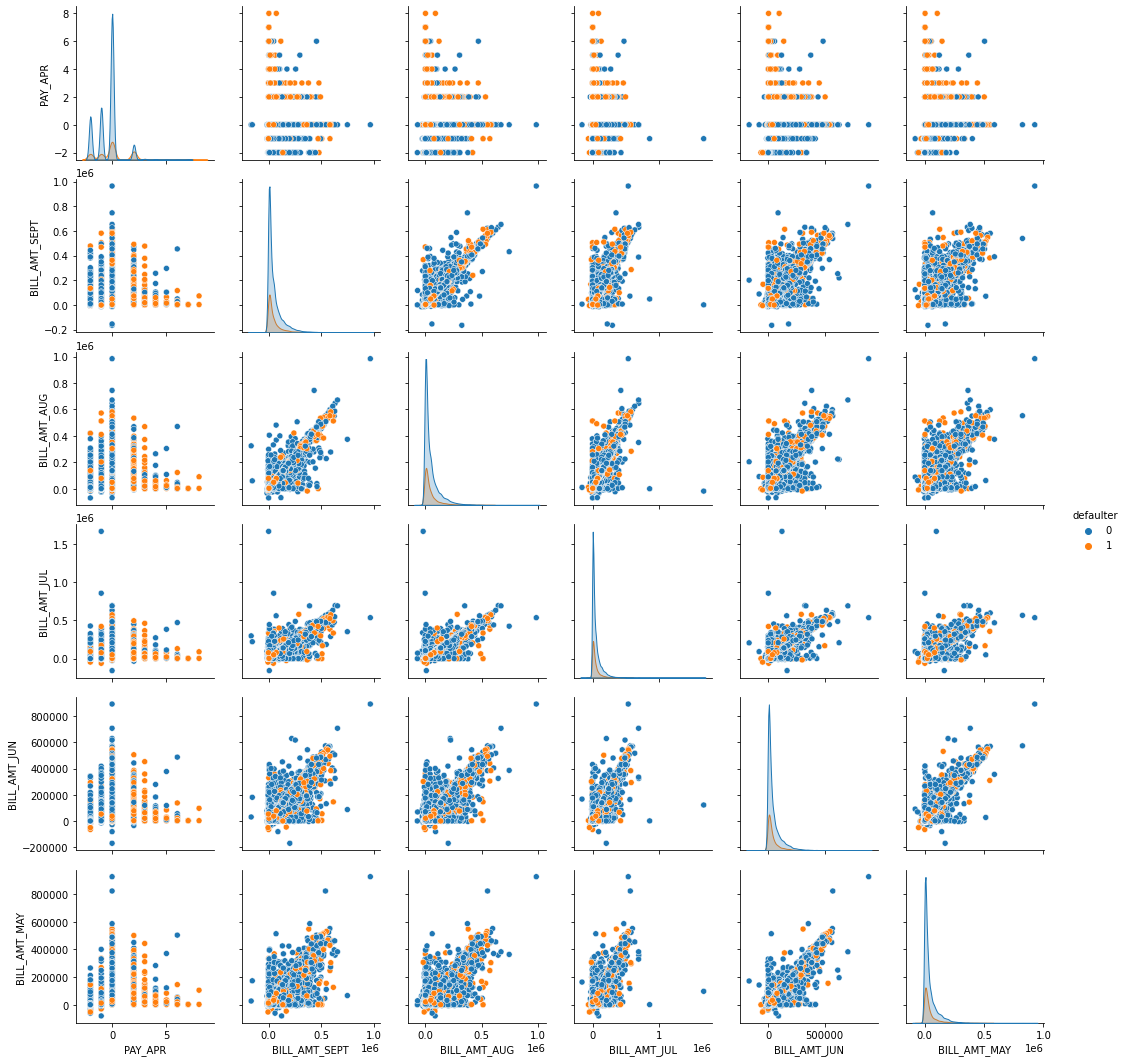

In [42]:
# plot columns with similar names to check the correlation

sns.pairplot(df, vars=df.columns[11:17], kind='scatter',hue= 'defaulter')


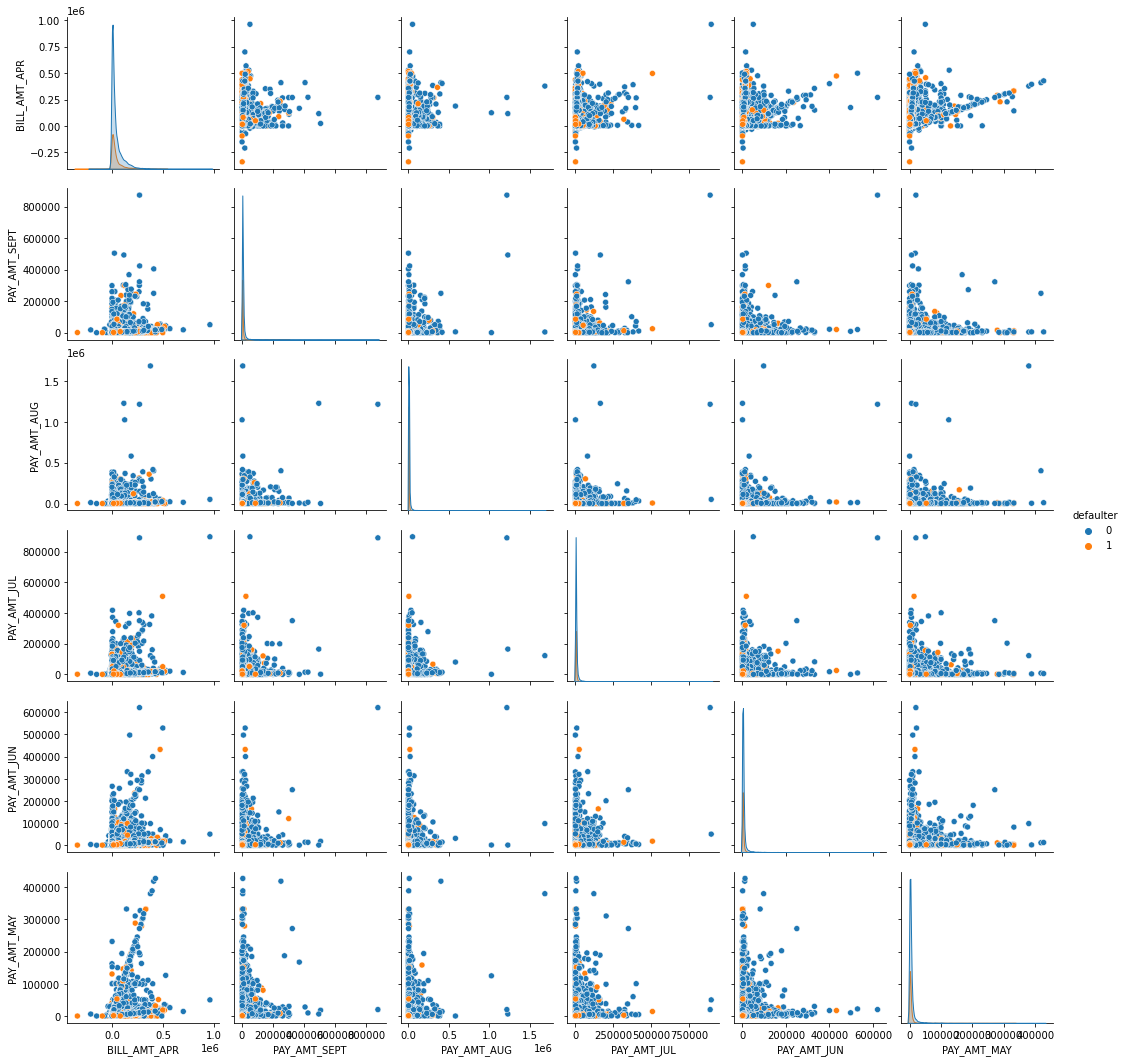

In [43]:
sns.pairplot(df, vars=df.columns[17:23],hue = 'defaulter')

#### Correlation between Features

In [44]:
df.corr(method='spearman').abs()['defaulter'].sort_values(ascending=False)

defaulter        1.000000
PAY_SEPT         0.292213
PAY_AUG          0.216919
PAY_JUL          0.194771
PAY_JUN          0.173690
LIMIT_BAL        0.169586
PAY_AMT_SEPT     0.160493
PAY_MAY          0.159043
PAY_AMT_AUG      0.150977
PAY_APR          0.142523
PAY_AMT_JUL      0.139388
PAY_AMT_JUN      0.127979
PAY_AMT_APR      0.121444
PAY_AMT_MAY      0.116587
EDUCATION        0.043425
SEX              0.039961
MARRIAGE         0.028698
BILL_AMT_SEPT    0.025327
BILL_AMT_AUG     0.015554
ID               0.013952
BILL_AMT_JUL     0.012670
BILL_AMT_JUN     0.008357
BILL_AMT_MAY     0.006851
AGE              0.005149
BILL_AMT_APR     0.000076
Name: defaulter, dtype: float64

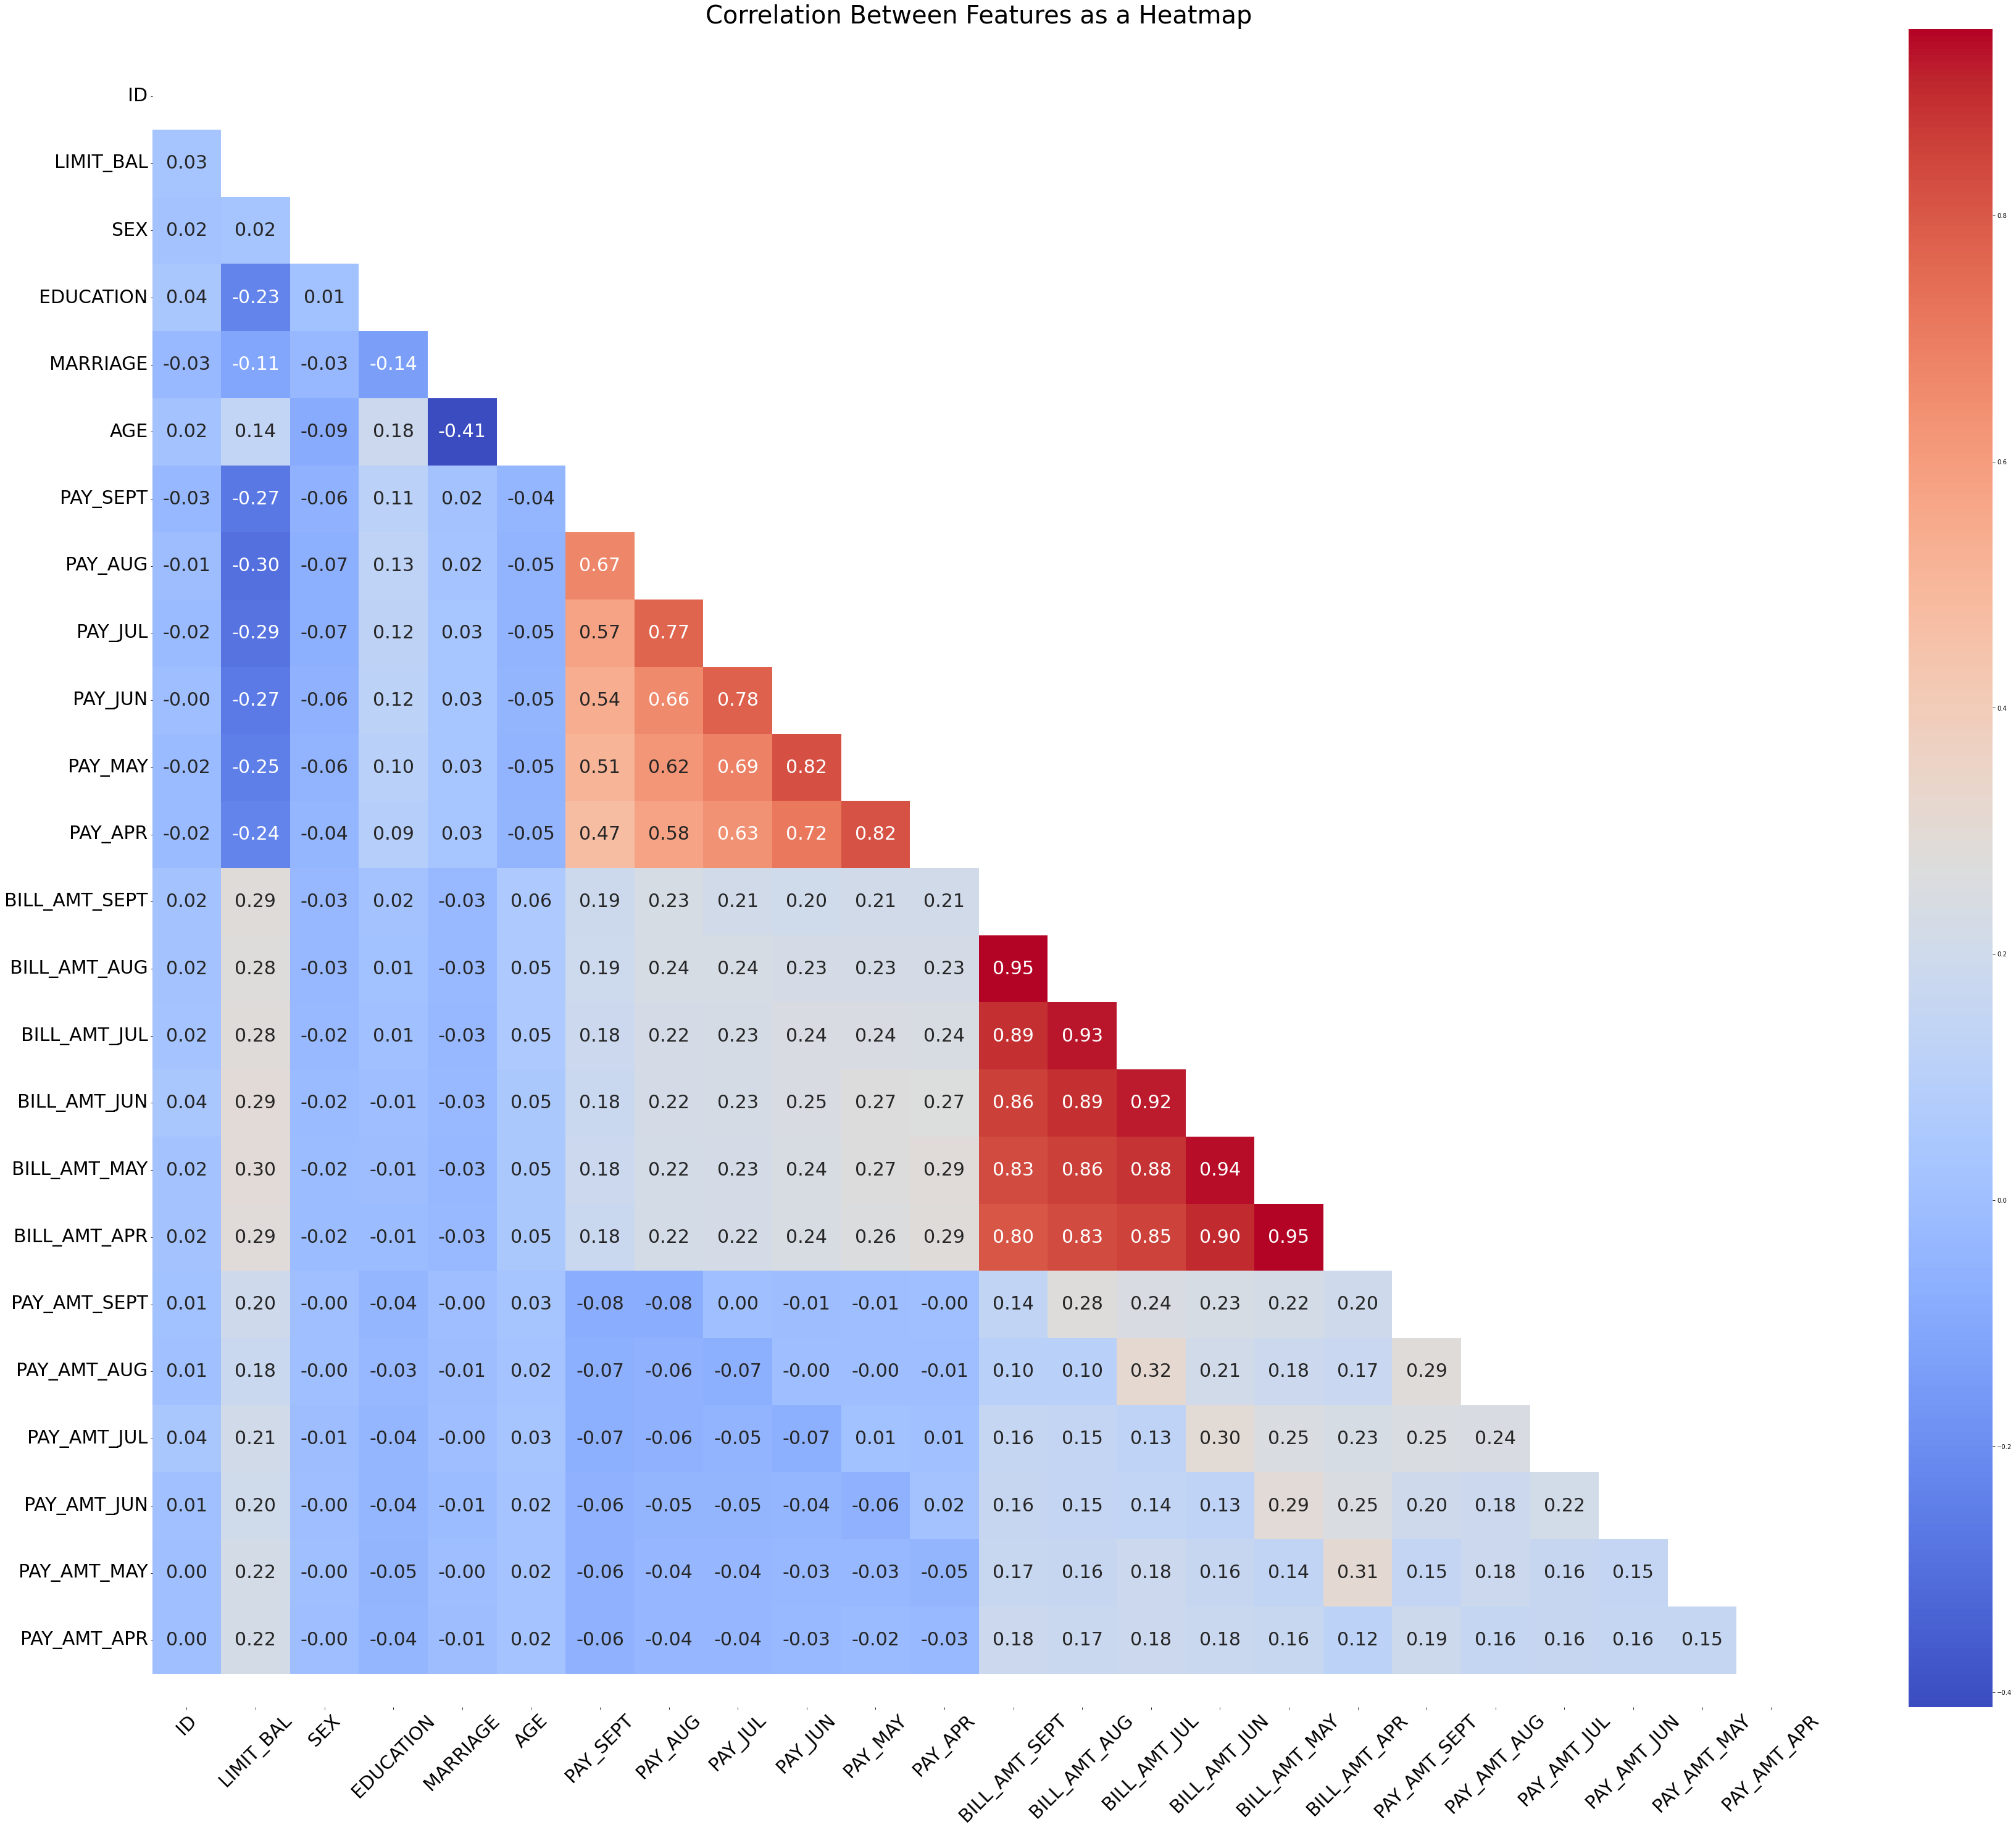

In [45]:
corr = df.iloc[:, :24].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))

# Plot the heatmap
g = sns.heatmap(data=corr, annot=True, ax=ax, cmap='coolwarm',
            cbar=True, fmt='.2f',
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":30},  #Annotation size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=30) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=45);


plt.title('Correlation Between Features as a Heatmap', size=40);

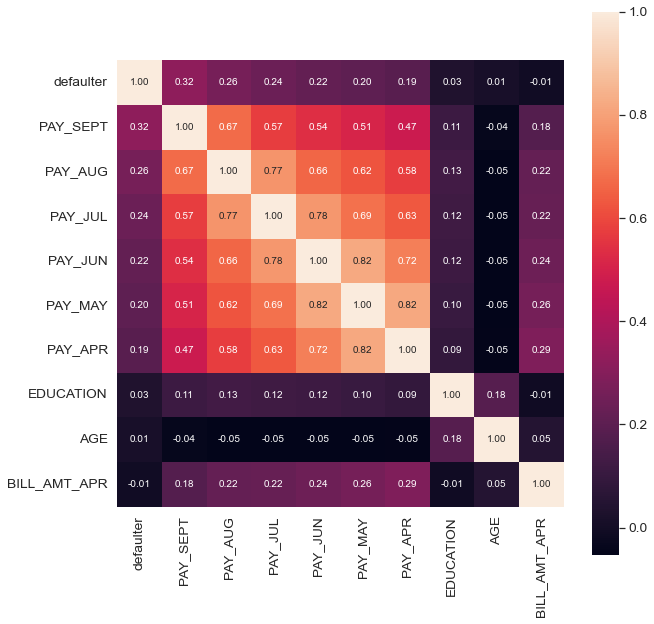

In [46]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'defaulter')['defaulter'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<AxesSubplot:title={'center':'Correlation with Default'}>

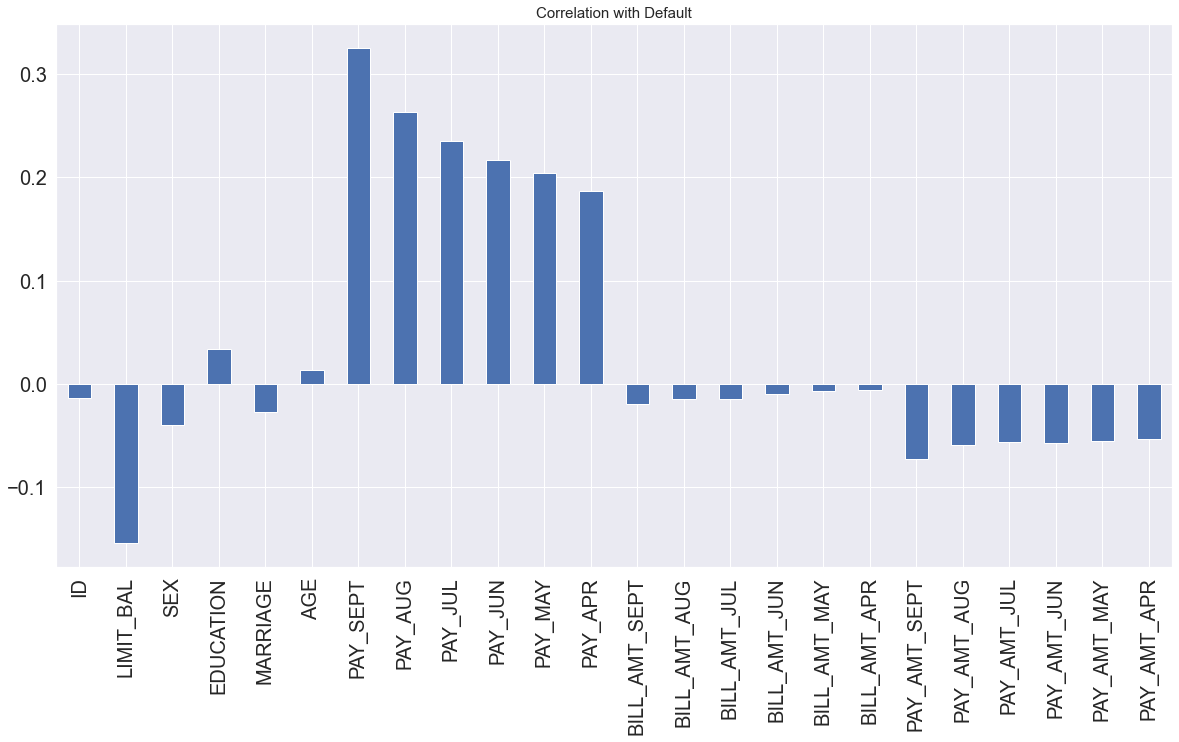

In [47]:
X = df.drop(['defaulter'],axis=1)
X.corrwith(df['defaulter']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)


### Creating some Additional columns

In [48]:
len(df.columns)

25

In [49]:
# Adding new Features
df['avg_default'] = df.iloc[:, 5:11].sum(axis=1) / 6 # average default history
df['avg_bill_amt'] = df.iloc[:, 11:17].sum(axis=1) / 6 # average bill amount
df['avg_pay_amt'] = df.iloc[:, 18:24].sum(axis=1) / 6 # average payment amount

In [50]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'defaulter', 'avg_default',
       'avg_bill_amt', 'avg_pay_amt'],
      dtype='object')

In [51]:
df.groupby('defaulter')['avg_default'].mean()

defaulter
0    5.640458
1    6.272780
Name: avg_default, dtype: float64

In [52]:
df.groupby('defaulter')['avg_pay_amt'].mean()


defaulter
0    5828.236775
1    3328.215617
Name: avg_pay_amt, dtype: float64

In [53]:
df.groupby('defaulter')['LIMIT_BAL'].mean()

defaulter
0    178099.726074
1    130109.656420
Name: LIMIT_BAL, dtype: float64

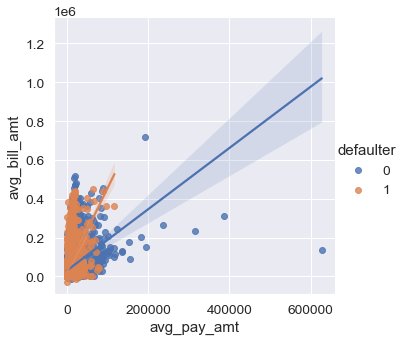

In [54]:
# Scatter plot of average payment amount and average bill amount 
sns.lmplot('avg_pay_amt', 'avg_bill_amt', df, hue='defaulter')
fig = plt.gcf()
plt.show()

there is a marked difference in slope in the line of best fit for the default and non-default class.


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             30000 non-null  int64  
 1   LIMIT_BAL      30000 non-null  float64
 2   SEX            30000 non-null  int64  
 3   EDUCATION      30000 non-null  int64  
 4   MARRIAGE       30000 non-null  int64  
 5   AGE            30000 non-null  int64  
 6   PAY_SEPT       30000 non-null  int64  
 7   PAY_AUG        30000 non-null  int64  
 8   PAY_JUL        30000 non-null  int64  
 9   PAY_JUN        30000 non-null  int64  
 10  PAY_MAY        30000 non-null  int64  
 11  PAY_APR        30000 non-null  int64  
 12  BILL_AMT_SEPT  30000 non-null  float64
 13  BILL_AMT_AUG   30000 non-null  float64
 14  BILL_AMT_JUL   30000 non-null  float64
 15  BILL_AMT_JUN   30000 non-null  float64
 16  BILL_AMT_MAY   30000 non-null  float64
 17  BILL_AMT_APR   30000 non-null  float64
 18  PAY_AM

In [57]:
!pip install plotly

In [59]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample 
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# BaseLine Model

* A baseline model that uses heuristics, simple summary statistics, randomness, or machine learning to create predictions for a dataset. You can use these predictions to measure the baseline's performance (e.g., accuracy)-- this metric will then become what you compare any other machine learning algorithm against.
* I will build logistic regression without any hyperparameter tuning or feature engineering

In [60]:
X = df.drop(['defaulter','ID'], axis=1)  
y = df['defaulter']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [61]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,y_test))

cv_scores = cross_val_score(LR, X, y, cv=5)
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Accuracy: 0.7787777777777778

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.50      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.64      0.50      0.44      9000
weighted avg       0.72      0.78      0.68      9000


Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0001


baseline model has an accuracy of 0.77. We have to better this with other models

## Feature Engineering

In [62]:
df[['SEX','MARRIAGE','EDUCATION']] = df[['SEX','MARRIAGE','EDUCATION']].astype('object')

#One Hot encoding
df = pd.get_dummies(df)
df.head()

,ID,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,...,avg_pay_amt,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,114.833333,0,1,0,1,0,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,833.333333,0,1,0,1,0,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1836.333333,0,1,0,1,0,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1398.000000,0,1,0,1,0,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,9841.500000,1,0,0,1,0,0,1,0,0


In [63]:
#Handling Outlier
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
df=df.apply(outlier_capping)

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for column in df.columns:
    if column != 'defaulter':
        df[column] = scaler.fit_transform(np.array(df[column]).reshape(-1,1))

In [81]:
# Train Test Split
X = df.drop(['defaulter','ID'], axis=1)  
y = df['defaulter']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [82]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

In [83]:
# We have observed that there is imbalance in the samples. Let's see the distribution of the samples in the train dataset
# Separate majority and minority classes
df_majority = df_train[df_train.defaulter == 0]
df_minority = df_train[df_train.defaulter == 1]

print(df_majority.defaulter.count())
print("-----------")
print(df_minority.defaulter.count())
print("-----------")
print(df_train.defaulter.value_counts())

16324
-----------
4676
-----------
0    16324
1     4676
Name: defaulter, dtype: int64


* There's a lot of imbalance in the sample. So there are many ways to resampling!
* Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution. This is a simple and effective strategy for imbalanced classification problems.
* The simplest strategy is to choose examples for the transformed dataset randomly, called random resampling. There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

-> Methods to solve class imbalance problem
* A) Random Oversampling: Randomly duplicate examples in the minority class.
* B) Random Undersampling: Randomly delete examples in the majority class.
* C) SMOTE: Synthetic Minority Oversampling Technique

#### A) Random Oversampling:

* Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.
* Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

In [84]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples = 16355,    # to match majority class
                                 random_state= 42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.defaulter.value_counts()

1    16355
0    16324
Name: defaulter, dtype: int64

#### B) Random Undersampling:
* Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.
* This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class.¶
* This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit.


In [85]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4645,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.defaulter.value_counts()

1    4676
0    4645
Name: defaulter, dtype: int64

#### C) SMOTE: Synthetic Minority Oversampling Technique
* The upsample has the disadvantage of increasing the likelihood of overfitting since it replicates the minority class event. It usually outperform the downsampling. The downsample can discard potentially useful information and the sample can be biased, but it helps improving the run time
* SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. To create a syntetic sample I want to use the SMOTE algorithm, which is an oversampling method which creates syntetic samples from the minority class instead of creating copies. It selects 2 or more similar instances and perturb them one at a time by random amount. This techniques should avoid overfitting problems but it risks adding noise to the model


In [86]:
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(y_SMOTE.value_counts())

1    16324
0    16324
Name: defaulter, dtype: int64


## Model Building and evaluation

### Here We are considering only SMOTE technique

The evaluation will be based on K fold cross validation of AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve score which is considered as the best metric for binary classification and also the test score¶

In [96]:
# Helper Function for printing Accuracy matrices, plotting Confusiuon matrix and ROC curve

def helper(model,X_train,y_train,X_test,y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(train_pred, y_train)
    test_acc = accuracy_score(test_pred, y_test)
    prec = precision_score(y_test, test_pred)
    recc = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    acc_matrices = {'Train accuracy':train_acc,'Test accuracy':test_acc,'Precision':prec,'Recall':recc,'F1 Score':f1}

    print('\nTraining Accuracy Score: ',train_acc)
    print('Testing Accuracy Score: ',test_acc)
    print('Precision on test data: ',prec)
    print('Recall on test data: ',recc)
    print('F1 score on test data: ',f1)
    print('\n========================================================')
    print('Classification Report on Train data')
    print(classification_report(train_pred, y_train))
    print('\n========================================================')
    print('Classification Report on Test data')
    print(classification_report(test_pred, y_test))

    print('\n========================================================')
    # Plotting Confusion Matrix and ROC curve
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(test_pred, y_test)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
                xticklabels = ['Non-default', 'Default'], 
                yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(test_pred, y_test)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()
    return acc_matrices

## LR


Training Accuracy Score:  0.670056358735604
Testing Accuracy Score:  0.6708888888888889
Precision on test data:  0.36121883656509696
Recall on test data:  0.6653061224489796
F1 score on test data:  0.4682226211849192

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.67      0.67      0.67     16276
           1       0.67      0.67      0.67     16372

    accuracy                           0.67     32648
   macro avg       0.67      0.67      0.67     32648
weighted avg       0.67      0.67      0.67     32648


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.67      0.88      0.76      5390
           1       0.67      0.36      0.47      3610

    accuracy                           0.67      9000
   macro avg       0.67      0.62      0.61      9000
weighted avg       0.67      0.67      0.64      9000




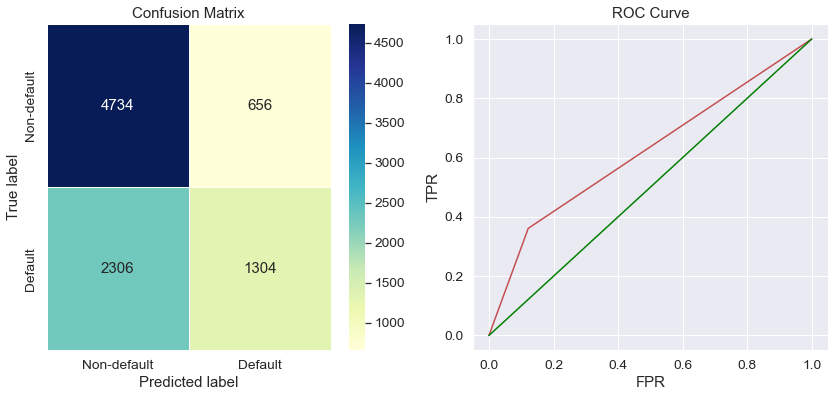

CPU times: user 3.08 s, sys: 714 ms, total: 3.79 s
Wall time: 674 ms


In [97]:
%%time
lr = LogisticRegression()
lr = lr.fit(X_SMOTE, y_SMOTE)
Acc_mat_lr = helper(lr,X_SMOTE,y_SMOTE,X_test,y_test)

## KNN

In [98]:
# %%time
# #Using GridsearchCV with standrardized data
# param_grid = {'n_neighbors':[3,4,5,6],
#               'weights': ['uniform', 'distance']}
# knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
# knn = knn.fit(X_SMOTE, y_SMOTE)

# print('Best Score: ',knn.best_score_)
# print('Best Parameters: ',knn.best_params_)
# Acc_mat_knn = helper(knn,X_SMOTE,y_SMOTE,X_test,y_test)

## DT


Training Accuracy Score:  0.6297476108796863
Testing Accuracy Score:  0.5655555555555556
Precision on test data:  0.2935196950444727
Recall on test data:  0.7071428571428572
F1 score on test data:  0.4148458545345705

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.53      0.66      0.59     13000
           1       0.73      0.61      0.66     19648

    accuracy                           0.63     32648
   macro avg       0.63      0.64      0.63     32648
weighted avg       0.65      0.63      0.63     32648


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.53      0.87      0.65      4278
           1       0.71      0.29      0.41      4722

    accuracy                           0.57      9000
   macro avg       0.62      0.58      0.53      9000
weighted avg       0.62      0.57      0.53      9000




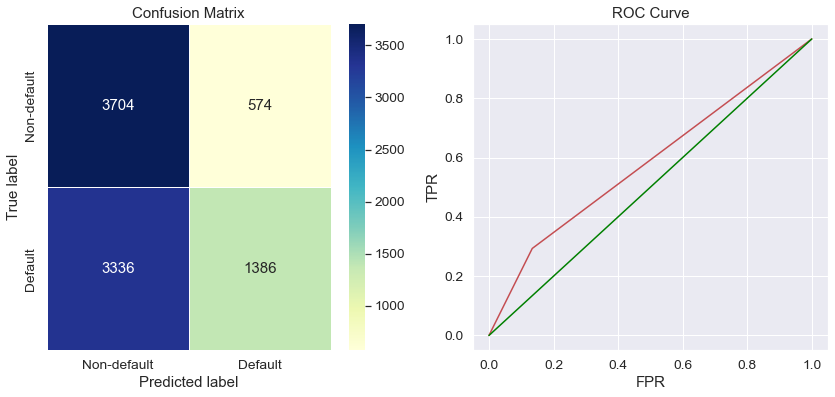

CPU times: user 379 ms, sys: 19.6 ms, total: 399 ms
Wall time: 210 ms


In [99]:
%%time
clf_tree = DecisionTreeClassifier( max_depth = 3, max_features=4, criterion='gini' )
clf_tree = clf_tree.fit(X_SMOTE, y_SMOTE)

Acc_mat_dt = helper(clf_tree,X_SMOTE,y_SMOTE,X_test,y_test)

## Random Forest


Training Accuracy Score:  0.8104324920362657
Testing Accuracy Score:  0.7695555555555555
Precision on test data:  0.475
Recall on test data:  0.5525510204081633
F1 score on test data:  0.5108490566037737

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.87      0.78      0.82     18189
           1       0.75      0.85      0.80     14459

    accuracy                           0.81     32648
   macro avg       0.81      0.81      0.81     32648
weighted avg       0.82      0.81      0.81     32648


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      6720
           1       0.55      0.47      0.51      2280

    accuracy                           0.77      9000
   macro avg       0.69      0.67      0.68      9000
weighted avg       0.76      0.77      0.76      9000




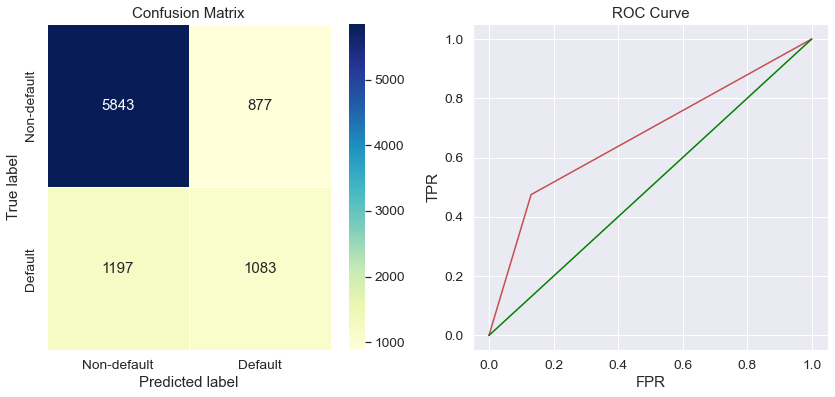

CPU times: user 5.18 s, sys: 108 ms, total: 5.29 s
Wall time: 1.13 s


In [100]:
%%time
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1)
radm_clf = radm_clf.fit(X_SMOTE, y_SMOTE)
Acc_mat_radm = helper(radm_clf,X_SMOTE,y_SMOTE,X_test,y_test)

## Adaboost


Training Accuracy Score:  0.7639365351629502
Testing Accuracy Score:  0.76
Precision on test data:  0.4569707401032702
Recall on test data:  0.5418367346938775
F1 score on test data:  0.4957983193277311

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.83      0.73      0.78     18391
           1       0.70      0.80      0.75     14257

    accuracy                           0.76     32648
   macro avg       0.76      0.77      0.76     32648
weighted avg       0.77      0.76      0.76     32648


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      6676
           1       0.54      0.46      0.50      2324

    accuracy                           0.76      9000
   macro avg       0.68      0.66      0.67      9000
weighted avg       0.75      0.76      0.75      9000




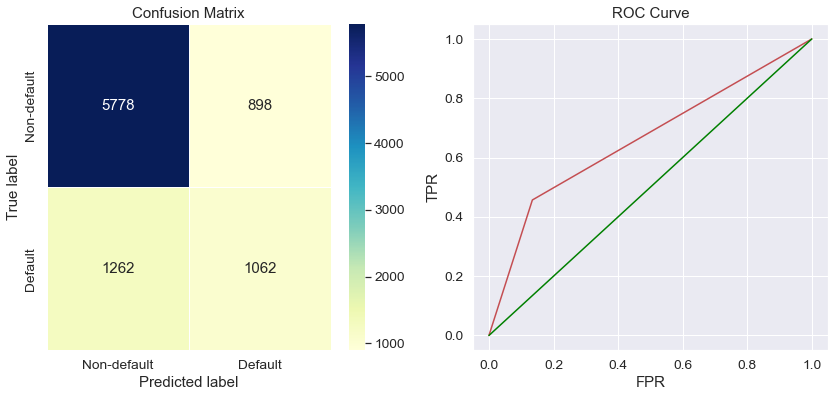

CPU times: user 3.07 s, sys: 30 ms, total: 3.1 s
Wall time: 2.57 s


In [101]:
%%time
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(random_state=123)
adb = adb.fit(X_SMOTE, y_SMOTE)
Acc_mat_adb = helper(adb,X_SMOTE,y_SMOTE,X_test,y_test)


## Xgboost

[16:13:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training Accuracy Score:  0.9271318304337173
Testing Accuracy Score:  0.8045555555555556
Precision on test data:  0.5739514348785872
Recall on test data:  0.3979591836734694
F1 score on test data:  0.47002109068996684

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     17609
           1       0.89      0.96      0.92     15039

    accuracy                           0.93     32648
   macro avg       0.93      0.93      0.93     32648
weighted avg       0.93      0.93      0.93     32648


Classification Report on Test data
              precision    recall  f1-score   support

         

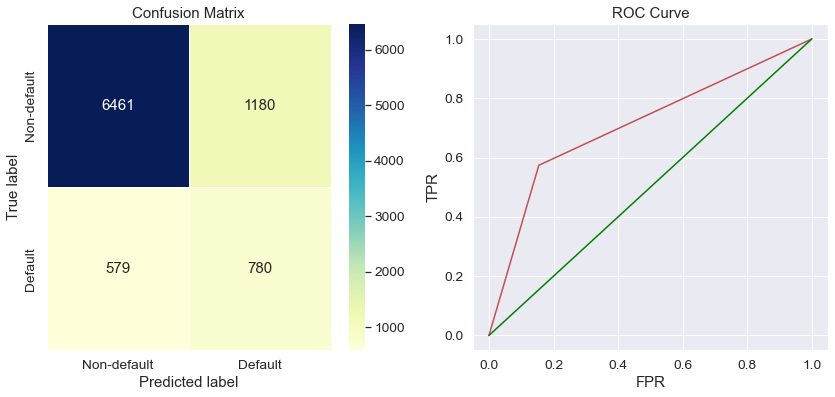

CPU times: user 15.6 s, sys: 3.17 s, total: 18.8 s
Wall time: 2.89 s


In [102]:
%%time
import xgboost as xgb
xgb = XGBClassifier(random_state=123)
xgb = xgb.fit(X_SMOTE, y_SMOTE)

Acc_mat_xgb = helper(xgb,X_SMOTE,y_SMOTE,X_test,y_test)

In [104]:
import pickle
pickle.dump(xgb,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

### Plotting the accuray matrices

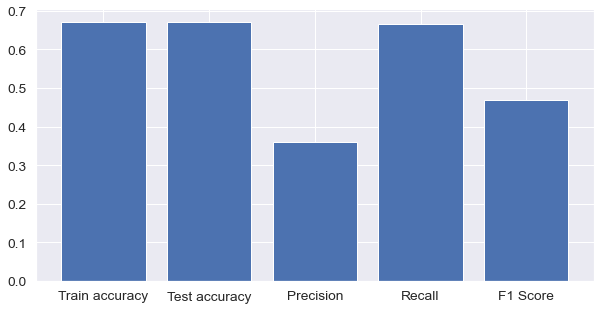

In [105]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(*zip(*Acc_mat_lr.items()))
plt.show()


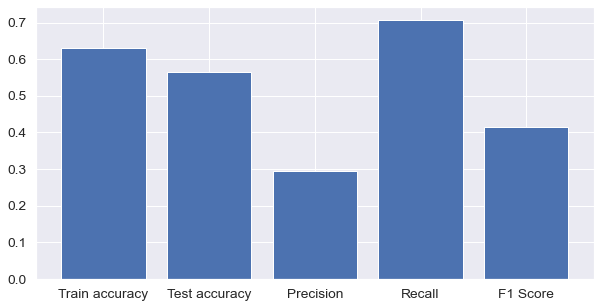

In [106]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(*zip(*Acc_mat_dt.items()))
plt.show()

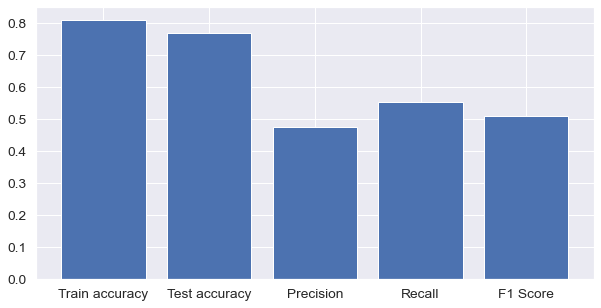

In [107]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(*zip(*Acc_mat_radm.items()))
plt.show()

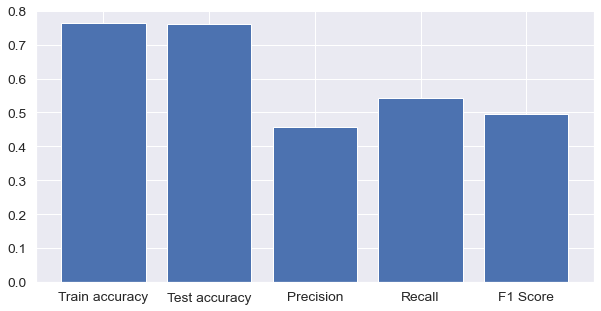

In [108]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(*zip(*Acc_mat_adb.items()))
plt.show()

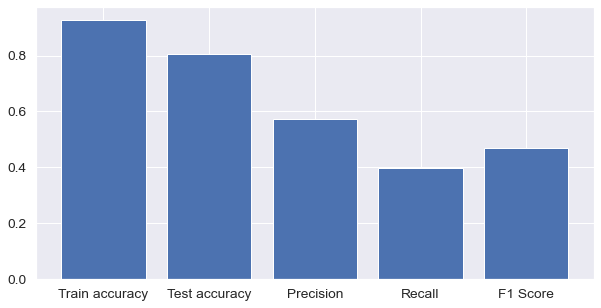

In [109]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(*zip(*Acc_mat_xgb.items()))
plt.show()

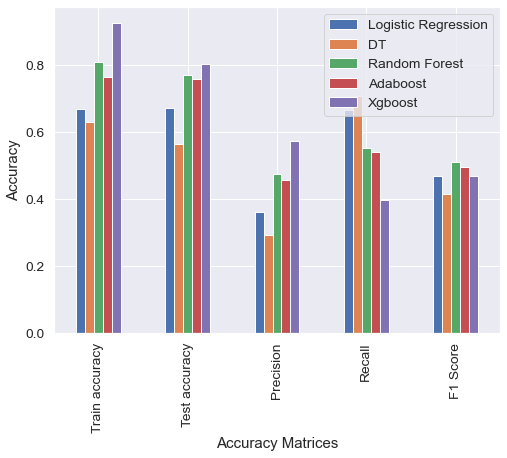

In [110]:
plot1=pd.DataFrame([Acc_mat_lr,Acc_mat_dt,Acc_mat_radm,Acc_mat_adb,Acc_mat_xgb], index=['Logistic Regression','DT','Random Forest','Adaboost','Xgboost']).transpose()

plot1.plot(kind='bar',figsize=(8,6))
plt.xlabel("Accuracy Matrices",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()